# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

Code is explained throughout.
Evereything within the blue area is pareto improvements.

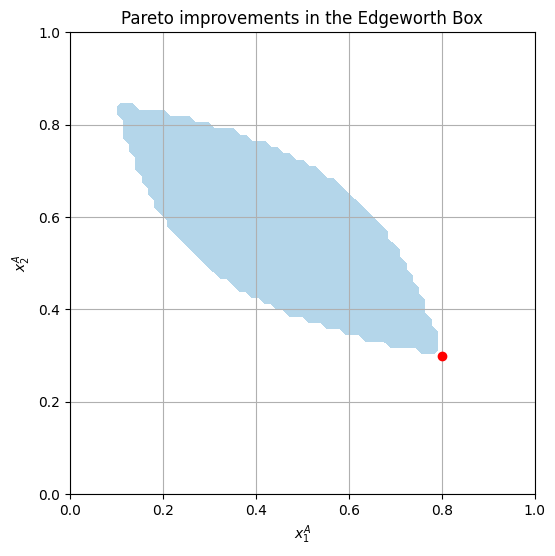

In [2]:
# code for solving the model (remember documentation and comments)

import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 1/3
beta = 2/3
w1A = 0.8
w2A = 0.3
w1B = 1 - w1A
w2B = 1 - w2A
N = 75

# Utility functions
def uA(x1A, x2A):
    return x1A ** alpha * (x2A ** (1 - alpha))

def uB(x1B, x2B):
    return (x1B * beta) * (x2B * (1 - beta))

# Initial utilities
uA_initial = uA(w1A, w2A)
uB_initial = uB(w1B, w2B)

# Edgeworth box setup
x1A_vals = np.linspace(0, 1, N)
x2A_vals = np.linspace(0, 1, N)
x1A_mesh, x2A_mesh = np.meshgrid(x1A_vals, x2A_vals)

# Find the pairs that satisfy the utility conditions
pareto_improvements = np.zeros(x1A_mesh.shape)
for i in range(N):
    for j in range(N):
        if uA(x1A_mesh[i, j], x2A_mesh[i, j]) >= uA_initial and uB(1 - x1A_mesh[i, j], 1 - x2A_mesh[i, j]) >= uB_initial:
            pareto_improvements[i, j] = 1

# Plot
plt.figure(figsize=(6, 6))
plt.contourf(x1A_mesh, x2A_mesh, pareto_improvements, cmap='Blues', levels=[0.5, 1], alpha=0.5)
plt.plot(w1A, w2A, 'ro')  # Endowment point
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.title('Pareto improvements in the Edgeworth Box')
plt.grid(True)
plt.show()

# Question 2

We weren't able to import the exchange economy class, so we pasted it instead and used it to calculate the market clearing errors.

In [3]:
from types import SimpleNamespace
import numpy as np

class ExchangeEconomyClass:

    def __init__(self):
        # Parameters
        par = self.par = SimpleNamespace()

        # Preferences
        par.alpha = 1/3
        par.beta = 2/3

        # Endowments
        par.w1A = 0.8
        par.w2A = 0.3

    def utility_A(self, x1A, x2A):
        # Utility function for consumer A
        return (x1A * self.par.alpha) * (x2A * (1 - self.par.alpha))

    def utility_B(self, x1B, x2B):
        # Utility function for consumer B
        return (x1B * self.par.beta) * (x2B * (1 - self.par.beta))

    def demand_A(self, p1, p2=1):
        # Demand function for consumer A
        I_A = self.par.w1A * p1 + self.par.w2A * p2
        x1A = self.par.alpha * I_A / p1
        x2A = (1 - self.par.alpha) * I_A / p2
        return x1A, x2A

    def demand_B(self, p1, p2=1):
        # Demand function for consumer B
        I_B = (1 - self.par.w1A) * p1 + (1 - self.par.w2A) * p2
        x1B = self.par.beta * I_B / p1
        x2B = (1 - self.par.beta) * I_B / p2
        return x1B, x2B

    def check_market_clearing(self, p1):
        # Check market clearing conditions
        x1A, x2A = self.demand_A(p1)
        x1B, x2B = self.demand_B(p1)
        eps1 = x1A - self.par.w1A + x1B - (1 - self.par.w1A)
        eps2 = x2A - self.par.w2A + x2B - (1 - self.par.w2A)
        return eps1, eps2

# Now, use the model to calculate market clearing errors for a range of prices p1
model = ExchangeEconomyClass()
N = 75
p1_values = np.linspace(0.5, 2.5, N)
market_clearing_errors = []

for p1 in p1_values:
    eps1, eps2 = model.check_market_clearing(p1)
    market_clearing_errors.append((p1, eps1, eps2))

# Display the results
print("p1, Market clearing error for good 1, Market clearing error for good 2")
for p1, eps1, eps2 in market_clearing_errors:
    print(f'{p1:.2f}, {eps1:.4f}, {eps2:.4f}')

p1, Market clearing error for good 1, Market clearing error for good 2
0.50, 0.5333, -0.2667
0.53, 0.4752, -0.2505
0.55, 0.4228, -0.2342
0.58, 0.3752, -0.2180
0.61, 0.3319, -0.2018
0.64, 0.2922, -0.1856
0.66, 0.2558, -0.1694
0.69, 0.2222, -0.1532
0.72, 0.1912, -0.1369
0.74, 0.1624, -0.1207
0.77, 0.1357, -0.1045
0.80, 0.1107, -0.0883
0.82, 0.0874, -0.0721
0.85, 0.0656, -0.0559
0.88, 0.0451, -0.0396
0.91, 0.0259, -0.0234
0.93, 0.0077, -0.0072
0.96, -0.0094, 0.0090
0.99, -0.0256, 0.0252
1.01, -0.0409, 0.0414
1.04, -0.0554, 0.0577
1.07, -0.0692, 0.0739
1.09, -0.0823, 0.0901
1.12, -0.0948, 0.1063
1.15, -0.1067, 0.1225
1.18, -0.1180, 0.1387
1.20, -0.1288, 0.1550
1.23, -0.1392, 0.1712
1.26, -0.1491, 0.1874
1.28, -0.1586, 0.2036
1.31, -0.1677, 0.2198
1.34, -0.1764, 0.2360
1.36, -0.1848, 0.2523
1.39, -0.1929, 0.2685
1.42, -0.2006, 0.2847
1.45, -0.2081, 0.3009
1.47, -0.2153, 0.3171
1.50, -0.2222, 0.3333
1.53, -0.2289, 0.3495
1.55, -0.2354, 0.3658
1.58, -0.2416, 0.3820
1.61, -0.2476, 0.3982
1.64,

# Question 3

We find that the market-clearing price p1 is approximately: 0.93

In [4]:
# Initialize variables to store the best (smallest) error and corresponding p1
best_error = float('inf')  # Set initial best error to be infinitely large
best_p1 = None  # Initialize best p1 as None

# Go through each price and its errors
for p1, eps1, eps2 in market_clearing_errors:
    total_error = abs(eps1) + abs(eps2)  # Combine the absolute errors
    if total_error < best_error:
        best_error = total_error
        best_p1 = p1

# Print the market-clearing price
print(f'The market-clearing price p1 is approximately: {best_p1:.2f}')

The market-clearing price p1 is approximately: 0.93


# Question 4a

We find the best allocation under given constraints

In [5]:
# Assuming the ExchangeEconomyClass and model are already defined as before

# Define the price range for P1
N = 75
p1_values = np.linspace(0.5, 2.5, N)
max_utility = -np.inf  # Start with a very low utility value
best_p1 = None  # Best price is unknown initially
best_allocation = None  # Best allocation is unknown initially

for p1 in p1_values:
    x1B, x2B = model.demand_B(p1)
    # Consumer A gets whatever is left after B's consumption
    x1A = 1 - x1B
    x2A = 1 - x2B
    # Calculate A's utility for this allocation
    utility = model.utility_A(x1A, x2A)
    # Check if this utility is better than the best one found so far
    if utility > max_utility:
        max_utility = utility
        best_p1 = p1
        best_allocation = (x1A, x2A)

# Display the results
print(f'Best price p1 for A to choose: {best_p1:.2f}')
print(f'Best allocation for A (x1A, x2A): ({best_allocation[0]:.2f}, {best_allocation[1]:.2f})')
print(f'Maximized utility for A: {max_utility:.4f}')

Best price p1 for A to choose: 2.50
Best allocation for A (x1A, x2A): (0.68, 0.60)
Maximized utility for A: 0.0907


# Question 4b

insert code and explain 

# Question 5a

We find the best allocation under given constraints

In [6]:
from scipy.optimize import minimize
import numpy as np

# Assume that ExchangeEconomyClass and model instance are defined as earlier

# Initial endowments and utilities
w1A, w2A = model.par.w1A, model.par.w2A
w1B, w2B = 1 - w1A, 1 - w2A  # B's endowment
uB_initial = model.utility_B(w1B, w2B)  # B's utility at initial endowment

# Constraint: B should not be worse off
def constraint(x):
    x1A, x2A = x
    x1B, x2B = 1 - x1A, 1 - x2A  # B's consumption is what's left
    return model.utility_B(x1B, x2B) - uB_initial

# A's utility function to be maximized (negative for minimization)
def objective(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A)  # Negative because we minimize

# Define bounds and constraints
bounds = [(0, 1), (0, 1)]  # x1A and x2A must be between 0 and 1
cons = {'type': 'ineq', 'fun': constraint}  # B's utility must be at least uB_initial

# Initial guess
x0 = [w1A, w2A]  # Start from A's initial endowment

# Solve the optimization problem
result = minimize(objective, x0, bounds=bounds, constraints=cons)

# Extract the optimal allocation
x1A_opt, x2A_opt = result.x
x1B_opt, x2B_opt = 1 - x1A_opt, 1 - x2A_opt

# Print results
print(f'Optimal allocation for A: x1A = {x1A_opt:.4f}, x2A = {x2A_opt:.4f}')
print(f'Optimal allocation for B: x1B = {x1B_opt:.4f}, x2B = {x2B_opt:.4f}')
print(f'Optimized utility for A: {model.utility_A(x1A_opt, x2A_opt):.4f}')

Optimal allocation for A: x1A = 0.6258, x2A = 0.6258
Optimal allocation for B: x1B = 0.3742, x2B = 0.3742
Optimized utility for A: 0.0870


# Question 5b

We solve the problem with given constraints ensuring that consumer B is not worse off

In [7]:
from scipy.optimize import minimize
import numpy as np

# Assume that ExchangeEconomyClass and model instance are defined as earlier

# Utility for B at their initial endowment
uB_initial = model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)  # B's initial utility

# Constraint: B should not be worse off than their initial endowment
def constraint(x):
    x1A, x2A = x  # Allocation for A
    x1B, x2B = 1 - x1A, 1 - x2A  # B's allocation
    return model.utility_B(x1B, x2B) - uB_initial  # B's utility - B's initial utility

# A's utility function to be maximized (negated for minimization)
def objective(x):
    x1A, x2A = x  # Allocation for A
    return -model.utility_A(x1A, x2A)  # Negated because we minimize

# Bounds for the optimization (A's allocation can't be negative or more than available)
bounds = [(0, 1), (0, 1)]  # A's allocations must be between 0 and 1

# Define the constraints as a dictionary
constraints = ({'type': 'ineq', 'fun': constraint})

# Initial guess for the optimization (start from A's endowment)
x0 = [model.par.w1A, model.par.w2A]

# Perform the optimization
result = minimize(objective, x0, bounds=bounds, constraints=constraints)

# Extract the optimal allocations
x1A_opt, x2A_opt = result.x
x1B_opt, x2B_opt = 1 - x1A_opt, 1 - x2A_opt  # B's allocation

# Output results
print(f'Optimal allocation for A: x1A = {x1A_opt:.4f}, x2A = {x2A_opt:.4f}')
print(f'Optimal allocation for B: x1B = {x1B_opt:.4f}, x2B = {x2B_opt:.4f}')
print(f'Optimized utility for A: {model.utility_A(x1A_opt, x2A_opt):.4f}')

Optimal allocation for A: x1A = 0.6258, x2A = 0.6258
Optimal allocation for B: x1B = 0.3742, x2B = 0.3742
Optimized utility for A: 0.0870


# Question 6a

We maximize the total utility in the economy, considering the utilities of both consumers A and B.

In [8]:
from scipy.optimize import minimize
import numpy as np

# Assume that ExchangeEconomyClass and model instance are defined as earlier

# Combined utility function to be maximized
def combined_utility(x):
    x1A, x2A = x  # A's allocation
    x1B, x2B = 1 - x1A, 1 - x2A  # B's allocation from the remainder
    return -(model.utility_A(x1A, x2A) + model.utility_B(x1B, x2B))  # Negate for minimization

# Bounds for the optimization (A's allocation can't be negative or more than available)
bounds = [(0, 1), (0, 1)]  # Both x1A and x2A must be between 0 and 1

# Initial guess for the optimization (could start from any feasible allocation)
x0 = [0.5, 0.5]  # Starting point in the middle of the allocation space

# Perform the optimization
result = minimize(combined_utility, x0, bounds=bounds)

# Extract the optimal allocations
x1A_opt, x2A_opt = result.x
x1B_opt, x2B_opt = 1 - x1A_opt, 1 - x2A_opt  # B's optimal allocation from what's left

# Output results
print(f'Optimal allocation for A: x1A = {x1A_opt:.4f}, x2A = {x2A_opt:.4f}')
print(f'Optimal allocation for B: x1B = {x1B_opt:.4f}, x2B = {x2B_opt:.4f}')
print(f'Optimized total utility: {-result.fun:.4f}')  # Negate result as we minimized


Optimal allocation for A: x1A = 0.5000, x2A = 0.5000
Optimal allocation for B: x1B = 0.5000, x2B = 0.5000
Optimized total utility: 0.1111


# Question 6b

Results Recap:
(Question 3): This is the price at which the demand from consumer B meets the supply (initially owned by consumer A), ensuring no excess demand or supply in the market for both goods.

(Question 4a): Consumer A chooses the price to maximize their utility given a set of possible prices, with consumer B responding optimally to those prices.

(Question 4b): Consumer A chooses any positive price to maximize their utility with consumer B responding optimally.

(Question 5a): Consumer A chooses the allocation to maximize their utility under the constraint that consumer B is not worse off than at their initial endowment.

(Question 5b): Consumer A chooses the allocation to maximize their utility without any restrictions.

(Question 6a): A utilitarian social planner chooses the allocation that maximizes the total utility of consumers A and B.

Discussion:

Market clearing price:
Pros: Leads to an efficient market where all goods are sold, and all demands are satisfied.
Cons: May not consider individual welfare or fairness. Some individuals may be worse off if the market clearing price is high or low relative to their endowment.

Maximization under set prices:
Pros: Consumer A can optimize utility within a range of prices, representing scenarios with price control.
Cons: The choice is limited by the set prices, and it might not lead to an optimal welfare outcome.

Maximization under any positive price:
Pros: Ensures no party is worse off, leading to potential Pareto improvements. Fair in the sense that it respects initial endowments.
Cons: May not reach the absolute utility maximum for A since it is constrained by B's welfare.

Pareto improvements: 
Pros: Maximizes A's utility without restrictions, leading to the highest possible outcome for A.
Cons: Risks leaving B worse off than at the start, which can be unfair or socially undesirable.


Social Planner's Problem:
Pros: Aims for overall social welfare maximization, considering the utilities of all individuals. Can lead to more equitable outcomes.
Cons: Individual freedoms are not considered. It might lead to allocations that, while utility maximizing on the whole, leave one party significantly worse off than they would prefer.



# Question 7

np.random.uniform(0, 1, N) generates N random numbers from a uniform distribution between 0 and 1.
We then use plt.scatter to plot these pairs in a scatter plot, where each point represents an element of the set WW.
The labels and title are added for clarity.

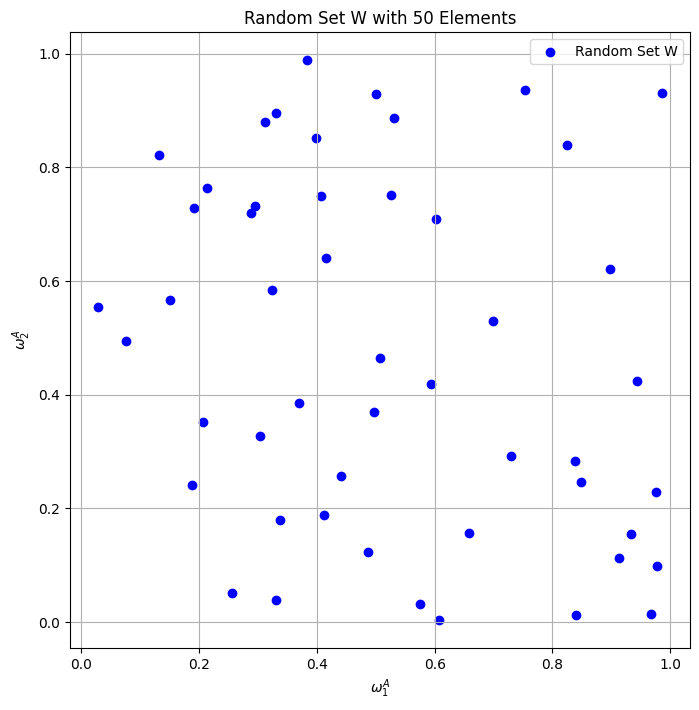

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Number of elements in the set
N = 50

# Generate N random values for ω1^A and ω2^A, each uniformly distributed between 0 and 1
omega_1A = np.random.uniform(0, 1, N)
omega_2A = np.random.uniform(0, 1, N)

# Plot these pairs
plt.figure(figsize=(8, 8))
plt.scatter(omega_1A, omega_2A, c='blue', label='Random Set W')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.title('Random Set W with 50 Elements')
plt.grid(True)
plt.legend()
plt.show()

# Question 8

In this code:

We generate a set WW with 50 elements, each representing a different initial endowment for consumer A.
We then plot these endowments in an Edgeworth box for both consumer A (in blue) and consumer B (in red), assuming the economy only consists of these two consumers and that all resources not owned by A are owned by B.
This visualizes the different potential market equilibrium allocations assuming that each initial endowment leads to an equilibrium where the goods are not traded (this is a simplification and may not hold if there are specific market mechanisms or preferences at play).

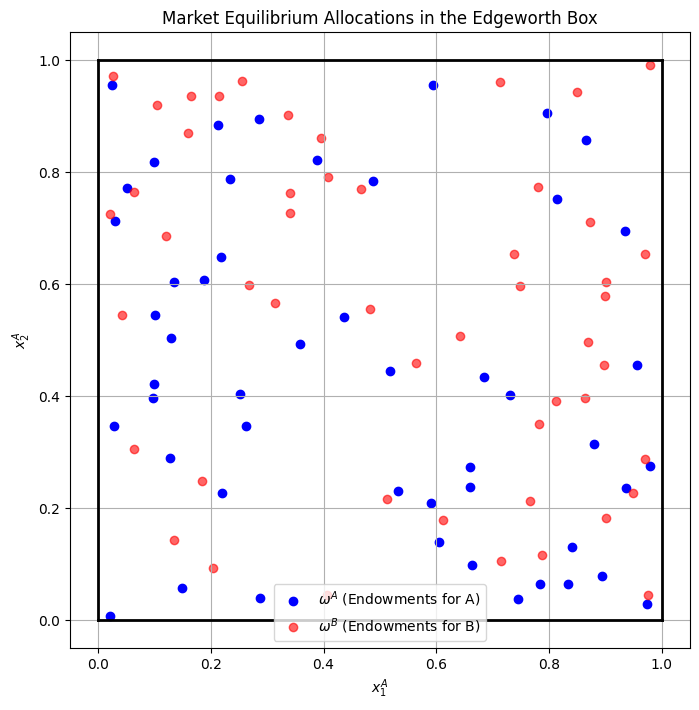

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Number of elements
N = 50

# Random endowments
omega_1A = np.random.uniform(0, 1, N)
omega_2A = np.random.uniform(0, 1, N)

# Plotting in the Edgeworth Box
plt.figure(figsize=(8, 8))
plt.scatter(omega_1A, omega_2A, c='blue', label='$\omega^A$ (Endowments for A)')
plt.scatter(1 - omega_1A, 1 - omega_2A, c='red', label='$\omega^B$ (Endowments for B)', alpha=0.6)  # Endowments for B are the remainders

# Set up the Edgeworth Box
plt.plot([0, 1], [0, 0], 'k-', lw=2)  # Bottom
plt.plot([0, 0], [0, 1], 'k-', lw=2)  # Left
plt.plot([1, 1], [0, 1], 'k-', lw=2)  # Top
plt.plot([0, 1], [1, 1], 'k-', lw=2)  # Right

# Labels and legend
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.title('Market Equilibrium Allocations in the Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()